In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt



In [ ]:
# Data Extraction
start_date = "2022-11-01"
end_date = datetime.now().strftime("%Y-%m-%d")
symbol = "SPY"

# USE YAHOO FINANCE
data = yf.download(symbol ,  start_date , end_date )
data = data[["Open" , "High" , "Low" , "Close" , "Volume"]]

data.tail(5)


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-10-26,416.450012,417.329987,411.600006,412.549988,115156800
2023-10-27,414.190002,414.600006,409.209991,410.679993,107367700
2023-10-30,413.559998,416.679993,412.220001,415.589996,86562700
2023-10-31,416.179993,418.529999,414.209991,418.200012,79665200
2023-11-01,419.200012,423.500000,418.649994,422.660004,97908900


In [ ]:

swing_highs = []
swing_high_dates = []
swing_lows = []
swing_low_dates = []
last_swing = None
last_swing_high = None
last_swing_low = None

# Iterate through data to find swings
for i in range(1, len(data) - 1):
    prev_high = data.iloc[i - 1]['High']
    curr_high = data.iloc[i]['High']
    next_high = data.iloc[i + 1]['High']

    prev_low = data.iloc[i - 1]['Low']
    curr_low = data.iloc[i]['Low']
    next_low = data.iloc[i + 1]['Low']

    # Determine if current point is a swing high or low
    is_swing_high = curr_high > prev_high and curr_high > next_high
    is_swing_low = curr_low < prev_low and curr_low < next_low

    # Update swing high if current high is higher than the last swing high
    if is_swing_high:
        if last_swing != 'high' or (last_swing_high is not None and curr_high > last_swing_high):
            if last_swing == 'high':
                # Replace the last swing high
                swing_highs[-1] = curr_high
                swing_high_dates[-1] = data.index[i]
            else:
                swing_highs.append(curr_high)
                swing_high_dates.append(data.index[i])
                last_swing = 'high'
            last_swing_high = curr_high
            print(f"{data.index[i]}: Found a higher swing high")

    # Update swing low if current low is lower than the last swing low
    if is_swing_low:
        if last_swing != 'low' or (last_swing_low is not None and curr_low < last_swing_low):
            if last_swing == 'low':
                # Replace the last swing low
                swing_lows[-1] = curr_low
                swing_low_dates[-1] = data.index[i]
            else:
                swing_lows.append(curr_low)
                swing_low_dates.append(data.index[i])
                last_swing = 'low'
            last_swing_low = curr_low
            print(f"{data.index[i]}: Found a lower swing low")






2022-11-03 00:00:00: Found a lower swing low
2022-11-08 00:00:00: Found a higher swing high
2022-11-09 00:00:00: Found a lower swing low
2022-11-15 00:00:00: Found a higher swing high
2022-11-15 00:00:00: Found a lower swing low
2022-11-17 00:00:00: Found a lower swing low
2022-11-18 00:00:00: Found a higher swing high
2022-11-21 00:00:00: Found a lower swing low
2022-11-23 00:00:00: Found a higher swing high
2022-11-29 00:00:00: Found a lower swing low
2022-12-01 00:00:00: Found a higher swing high
2022-12-06 00:00:00: Found a lower swing low
2022-12-13 00:00:00: Found a higher swing high
2022-12-20 00:00:00: Found a lower swing low
2022-12-21 00:00:00: Found a higher swing high
2022-12-22 00:00:00: Found a lower swing low
2022-12-29 00:00:00: Found a higher swing high
2023-01-03 00:00:00: Found a higher swing high
2023-01-03 00:00:00: Found a lower swing low
2023-01-09 00:00:00: Found a higher swing high
2023-01-10 00:00:00: Found a lower swing low
2023-01-17 00:00:00: Found a higher

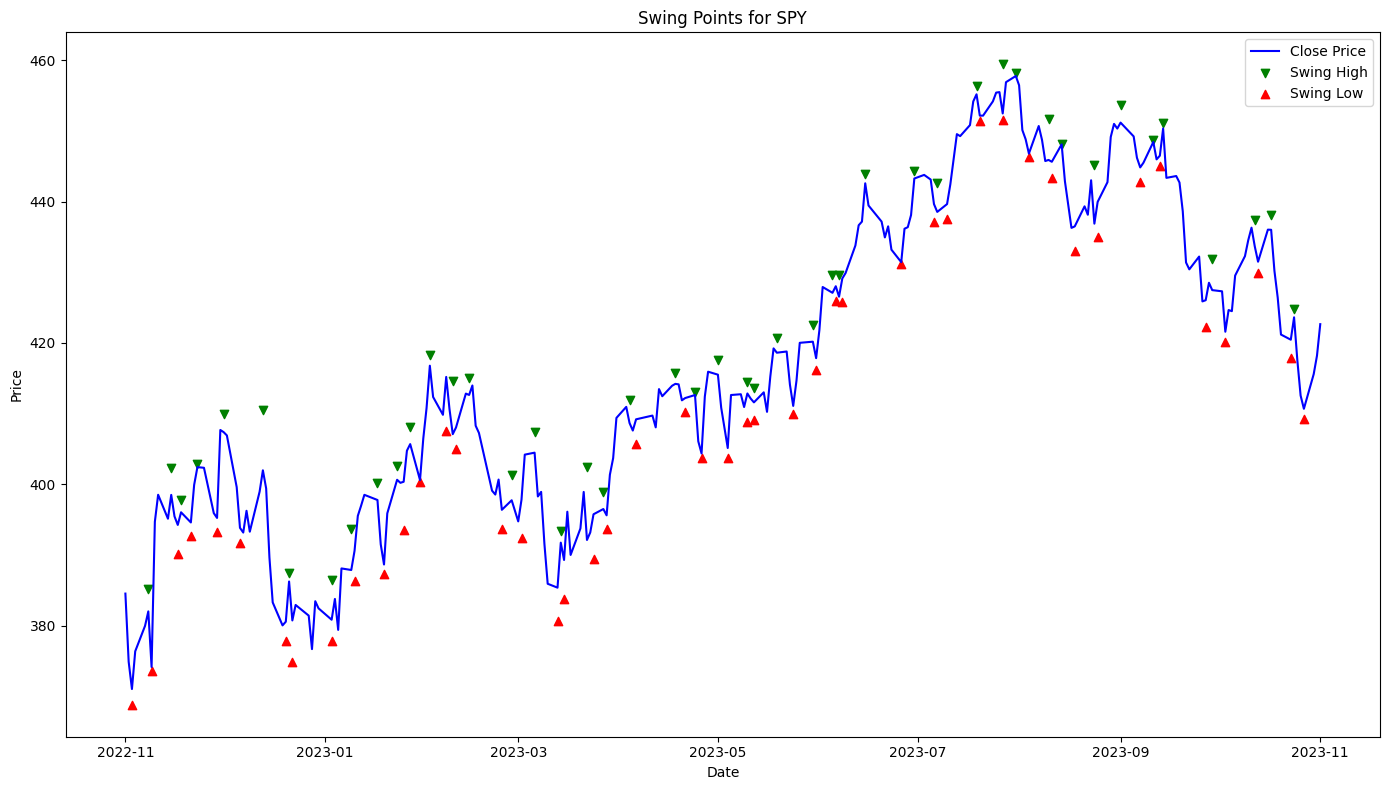

In [ ]:
# Create a plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the stock price
ax.plot(data.index, data['Close'], label='Close Price', color='blue')

# Add markers for the updated swing highs
ax.scatter(swing_high_dates, swing_highs, label='Swing High', color='green', marker='v')

# Add markers for the updated swing lows
ax.scatter(swing_low_dates, swing_lows, label='Swing Low', color='red', marker='^')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title(f'Swing Points for {symbol}')

# Add legend
ax.legend()

# Improve plot layout
plt.tight_layout()

# Show the plot
plt.show()

